In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

crabp=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uploaded Feature List_CrabUrine_pos_V2.txt',sep='\t')
print(crabp)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      ID Mode  Molecular Weight        m/z  ion  RT [min]  \
0      1    p         143.09448  144.10170  M+H     3.829   
1      2    p         127.94626  128.95352  M+H     4.365   
2      3    p         129.15178  130.15906  M+H     3.196   
3      4    p         137.04751  137.04746  M+H     3.413   
4      5    p         161.10502  162.11230  M+H     4.261   
..   ...  ...               ...        ...  ...       ...   
474  475    p         130.07825  131.08553  M+H     0.875   
475  476    p         120.09402  121.10130  M+H     0.874   
476  477    p         280.14223  281.14951  M+H     3.810   
477  478    p         245.07213  246.07956  M+H     1.044   
478  479    p         211.19342  212.20070  M+H     0.883   

                                  Name         Formula            MA  \
0                       DL-Stachydrine     C7 H13 N O2  7.241162e+

# New Section

In [41]:
known_p=crabp.dropna(subset=["Formula"]) 

In [50]:
knowp = known_p.loc[known_p['Name'].str.contains("_")]
#print(known_p)

In [49]:
Name_chemicals=known_p.drop(knowp.index)
#print(Name_chemicals)

In [48]:
crab_chemical=Name_chemicals.dropna(axis=1)
#print(crab_chemical)

In [44]:
pos_list= crab_chemical.groupby('Name')['MA',"MB","MD","OA","OC","OD"].transform('sum')
print(pos_list)

               MA            MB            MD            OA            OC  \
0    9.028845e+07  9.887430e+07  1.112548e+08  5.585505e+07  1.100479e+08   
2    9.570332e+06  4.012121e+06  6.908794e+06  9.664532e+07  4.489954e+06   
3    4.317981e+07  4.946685e+07  6.717958e+07  3.261907e+07  7.087417e+07   
4    5.054551e+07  4.204187e+07  5.364189e+07  2.505404e+07  5.047156e+07   
7    8.710038e+06  1.683875e+07  1.438723e+07  1.388306e+06  3.690965e+07   
..            ...           ...           ...           ...           ...   
466  2.036295e+04  3.741774e+04  3.694135e+04  7.886296e+03  7.980067e+04   
467  6.279628e+06  8.159101e+06  9.996995e+05  1.533065e+06  5.291834e+05   
468  8.710038e+06  1.683875e+07  1.438723e+07  1.388306e+06  3.690965e+07   
469  6.207885e+03  1.823597e+04  3.023378e+03  3.116340e+03  4.356501e+03   
478  1.922469e+03  1.388265e+04  7.630852e+03  1.548492e+03  4.999220e+03   

               OD  
0    9.862363e+07  
2    6.145834e+06  
3    5.759200e+

<ipython-input-44-064c38ca8033>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pos_list= crab_chemical.groupby('Name')['MA',"MB","MD","OA","OC","OD"].transform('sum')


In [30]:
new_list=pos_list.sort_values(by="MA",ascending=False).drop_duplicates()

In [47]:
final_n=crab_chemical.loc[new_list.index].sort_values(by="MA",ascending=False)
#print(final_n)

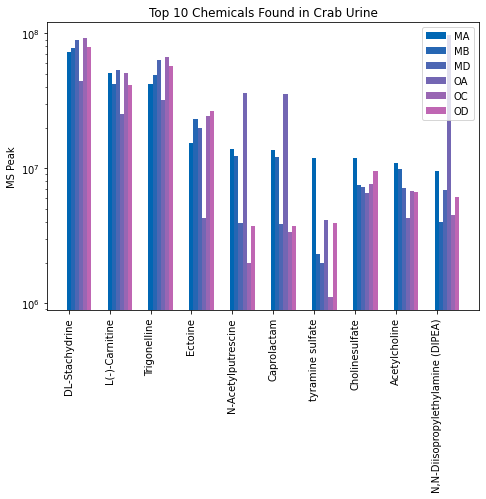

In [56]:
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(10)
final_n.reset_index

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ploty=[]
ploty=pd.DataFrame(ploty)
ploty[0]=final_n['MA']
ploty[1]=final_n['MB']
ploty[2]=final_n['MD']
ploty[3]=final_n['OA']
ploty[4]=final_n['OC']
ploty[5]=final_n['OD']
ploty[6]=final_n['Name']
for i in range(6):
  ax.bar(X + 0.1*i, ploty[i][0:10], color=(0.15*i, 0.4, 0.7, 1), width = 0.1,label=final_n.columns[i+8])
  ax.legend()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_yscale('log')
ax.set_xticklabels(ploty[6][0:10],rotation=90)
ax.set_ylabel("MS Peak")
plt.title("Top 10 Chemicals Found in Crab Urine")
plt.show()
